<a href="https://colab.research.google.com/github/adithya36/Used_Cars_Price_Prediction/blob/Data_cleaning/vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import
*   libraries
*   drive
*   df

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns

!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
import matplotlib.pyplot as plt
!pip install plotly
!pip install cufflinks
import plotly.express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

In [ ]:
!pip install geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("filepath_or_buffer", index_col=None)
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv", index_col=0)
#df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cars.csv", index_col=0)

# df1: **vehicles.csv**
*   describe
*   clean





In [ ]:
df = df1

In [ ]:
#get number of rows & cols
df.shape

(426880, 25)

In [ ]:
#get number of elements
df.size

10672000

In [ ]:
#get head
df.head(n=5)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  obje

In [ ]:
#get descriptive stats
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
#get sum nan
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
#get sum non nan
df.notnull().sum()

url             426880
region          426880
region_url      426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
county               0
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [ ]:
#drop rows: sum nan <19
df = df[df.isnull().sum(axis=1) < 19]
df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [ ]:
#float to int: year
df['year'] = df['year'].astype('Int32') 
df['year'] = df['year'].astype('Int64') 
assert df['year'].dtype == 'Int64'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#str to int: cylinder
df['cylinders'] = df['cylinders'].str.replace('cylinders',' ')
df['cylinders'] = df['cylinders'].str.strip()
df['cylinders'] = df['cylinders'].replace('nan',np.nan)
df['cylinders'] = df['cylinders'].replace('other', np.nan) #--> merge nan and other
df['cylinders'] = df['cylinders'].astype('float') 
df['cylinders'] = df['cylinders'].astype('Int32')
df['cylinders'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

<IntegerArray>
[8, 6, <NA>, 4, 5, 3, 10, 12]
Length: 8, dtype: Int32

In [ ]:
#remove duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(426812, 25)

In [ ]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

3736928711
0
75209.27384422181
13950.0


In [ ]:
df = df[df['condition'] != 'salvage'] 

In [ ]:
def condition_to_numeric(x):
  if x=='new': return 5
  if x=='like new': return 4
  if x=='excellent': return 3
  if x=='good': return 2
  if x=='fair': return 1
  #if x=='salvage': return 0 #--> ditch
  if x=='nan': return np.nan

df['condition_num'] = df['condition'].apply(condition_to_numeric)
df['condition_num'].unique()

array([ 2.,  3.,  1., nan,  4.,  5.])

In [ ]:
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.376763e+04,21999.0,145000,0
al,2.396907e+05,18989.0,987654321,0
ar,1.808590e+04,14546.0,163540,0
az,1.951215e+04,15990.0,239995,0
ca,1.203648e+05,12995.0,3009548743,0
co,1.814396e+04,14999.0,655000,0
ct,1.505717e+04,9995.0,1000000,0
dc,1.449162e+04,10999.5,304995,0


In [ ]:
df = df[df['price'] >=1000] #-->e.g.
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.425320e+04,22995.0,145000,1000
al,2.554669e+05,20590.0,987654321,1000
ar,2.284584e+04,19117.0,163540,1000
az,2.113734e+04,17000.0,239995,1000
ca,1.397961e+05,15590.0,3009548743,1000
co,1.947881e+04,16494.0,655000,1000
ct,1.587744e+04,10950.0,1000000,1000
dc,1.627223e+04,13000.0,304995,1000


Text(0, 0.5, 'Sales adverts')

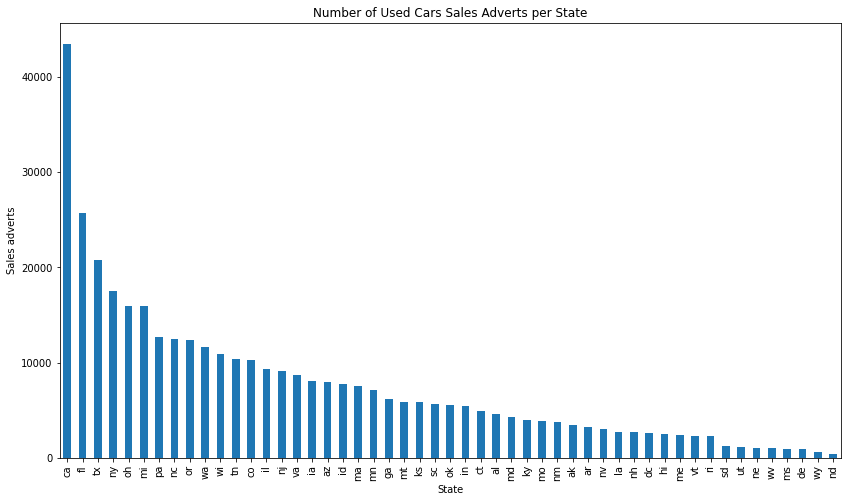

In [ ]:
#distribution bar chart --> state/sales adverts
plt = df['state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per State")
plt.set_xlabel("State")
plt.set_ylabel("Sales adverts")

Text(0, 0.5, 'Sales adverts')

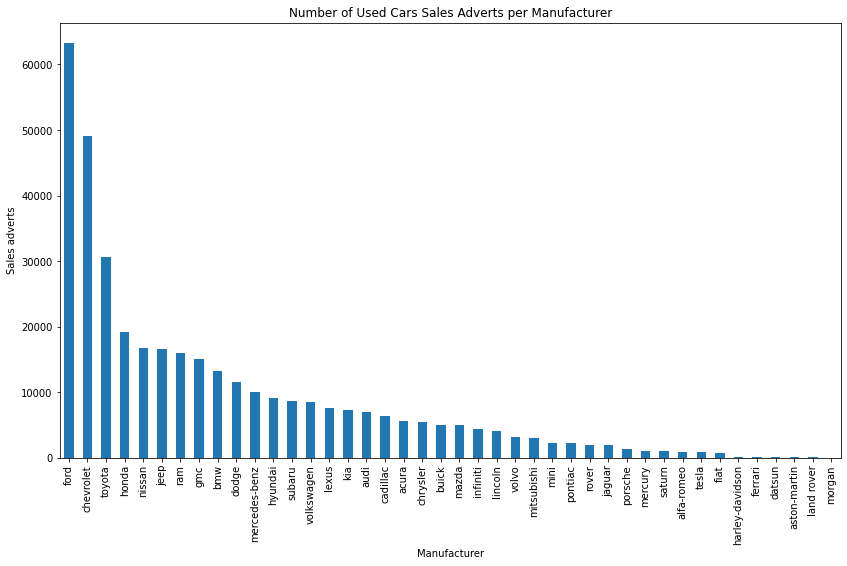

In [ ]:
#distribution bar chart --> brand/sales adverts
ax = df['manufacturer'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per Manufacturer")
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Sales adverts")

state
ak    2.425320e+04
al    2.554669e+05
ar    2.284584e+04
az    2.113734e+04
ca    1.397961e+05
co    1.947881e+04
ct    1.587744e+04
dc    1.627223e+04
de    3.444616e+06
fl    1.981785e+04
ga    1.793601e+05
hi    2.333688e+04
ia    1.733278e+04
id    4.111232e+04
il    1.836445e+04
in    2.484024e+05
ks    1.995128e+04
ky    1.968558e+04
la    2.123233e+04
ma    1.681686e+04
md    3.497275e+05
me    1.707248e+04
mi    3.195510e+04
mn    1.725396e+04
mo    2.316908e+04
ms    1.889114e+04
mt    2.503656e+04
nc    4.034065e+04
nd    2.364032e+04
ne    1.915866e+04
nh    1.961612e+04
nj    3.462386e+05
nm    2.245572e+04
nv    2.171101e+04
ny    1.877212e+04
oh    2.967507e+04
ok    4.421661e+04
or    3.228897e+05
pa    1.686143e+04
ri    1.692913e+04
sc    2.121430e+04
sd    1.955914e+04
tn    3.934844e+05
tx    2.354628e+04
ut    2.585816e+04
va    1.715516e+04
vt    1.785745e+04
wa    2.646311e+04
wi    1.724141e+04
wv    2.574502e+04
wy    2.264372e+04
Name: price, dtype: float

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



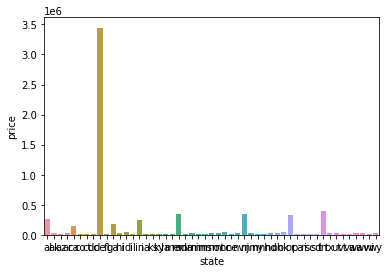

In [ ]:
#distribution bar chart --> state/ASP
print(df.groupby('state', as_index=True)['price'].mean())
plt2 = sns.barplot('state', 'price', data=df, ci=False)

       manufacturer          price
0             acura   21467.922673
1        alfa-romeo   29553.809802
2      aston-martin   61136.619048
3              audi   25617.969997
4               bmw   29685.363204
5             buick   40198.017886
6          cadillac   21362.952208
7         chevrolet  129742.205773
8          chrysler   11530.505319
9            datsun   16403.258621
10            dodge   17817.482426
11          ferrari  127583.487500
12             fiat   12897.722908
13             ford   40867.101688
14              gmc   33826.219761
15  harley-davidson   13643.191176
16            honda   11887.445885
17          hyundai   12266.738032
18         infiniti   21442.647636
19           jaguar   27735.673469
20             jeep  173028.561655
21              kia   12974.705752
22       land rover   15103.000000
23            lexus   20827.433448
24          lincoln   20974.836806
25            mazda   13681.055794
26    mercedes-benz  628495.549265
27          mercury 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



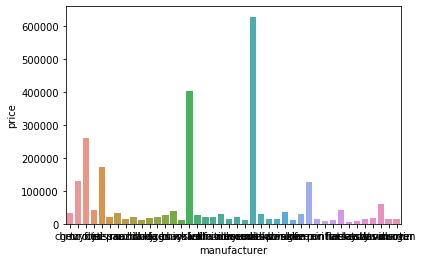

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer', as_index=False)['price'].mean()) #check ferrari etc. 100k > subset drop and graph
plt2 = sns.barplot('manufacturer', 'price', data=df, ci=False)

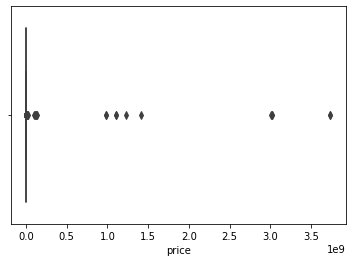

In [ ]:
#detect and remove outliers
sns.boxplot(x=df['price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price              20000
year                   9
cylinders              4
odometer           97862
county               NaN
lat              7.65379
long             30.0929
condition_num          1
dtype: object


In [ ]:
print(df < (Q1 - 1.5 * IQR))

              VIN  condition  condition_num  ...   type    url   year
id                                           ...                     
7316814884  False      False          False  ...  False  False  False
7316814758  False      False          False  ...  False  False  False
7316814989  False      False          False  ...  False  False  False
7316743432  False      False          False  ...  False  False  False
7316356412  False      False          False  ...  False  False  False
...           ...        ...            ...  ...    ...    ...    ...
7301591192  False      False          False  ...  False  False  False
7301591187  False      False          False  ...  False  False  False
7301591147  False      False          False  ...  False  False  False
7301591140  False      False          False  ...  False  False  False
7301591129  False      False          False  ...  False  False  False

[380070 rows x 26 columns]


In [ ]:
print(df > (Q3 + 1.5 * IQR))

              VIN  condition  condition_num  ...   type    url   year
id                                           ...                     
7316814884  False      False          False  ...  False  False  False
7316814758  False      False          False  ...  False  False  False
7316814989  False      False          False  ...  False  False  False
7316743432  False      False          False  ...  False  False  False
7316356412  False      False          False  ...  False  False  False
...           ...        ...            ...  ...    ...    ...    ...
7301591192  False      False          False  ...  False  False  False
7301591187  False      False          False  ...  False  False  False
7301591147  False      False          False  ...  False  False  False
7301591140  False      False          False  ...  False  False  False
7301591129  False      False          False  ...  False  False  False

[380070 rows x 26 columns]


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(348309, 26)

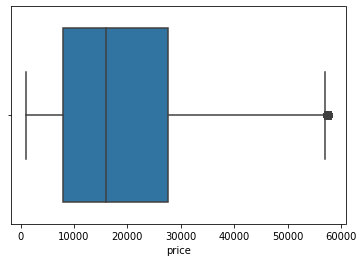

In [ ]:
sns.boxplot(x=df_out['price'])

       manufacturer         price
0             acura  21377.195311
1        alfa-romeo  30083.987531
2      aston-martin  27834.818182
3              audi  23988.763170
4               bmw  20598.209279
5             buick  15650.026534
6          cadillac  20871.802164
7         chevrolet  19435.804477
8          chrysler  11058.143568
9             dodge  16297.423030
10          ferrari   5263.500000
11             fiat  13149.869501
12             ford  20217.834425
13              gmc  23624.659363
14  harley-davidson  13314.218487
15            honda  11845.688125
16          hyundai  12209.693227
17         infiniti  21433.230663
18           jaguar  28136.014343
19             jeep  20668.692632
20              kia  12716.859028
21       land rover  11113.300000
22            lexus  20675.274374
23          lincoln  20421.788508
24            mazda  13762.209089
25    mercedes-benz  21356.745231
26          mercury   4666.857466
27             mini  14947.523855
28       mitsu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



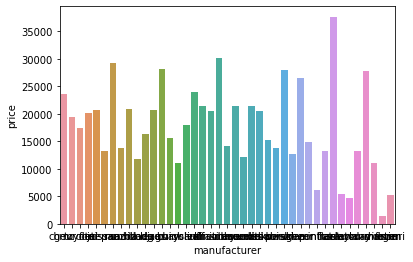

In [ ]:
print(df_out.groupby('manufacturer', as_index=False)['price'].mean()) 
plt2 = sns.barplot('manufacturer', 'price', data=df_out, ci=False)

In [ ]:
print(df_out['price'].max())
print(df_out['price'].min())
print(df_out['price'].mean())
print(df_out['price'].median())

57990
1000
18600.380992165003
15990.0


In [ ]:
#drop columns
#keep: fuel, transmission(gear), year, odometer, price, manufacturer
df_out = df_out.drop(['url','condition_num','region','region_url', 'model','condition','cylinders','title_status','VIN','drive','size','type','paint_color','image_url','description','county','state','lat','long','posting_date'],axis=1)
df = df_out

In [ ]:
#change col names
df = df.rename(columns={'transmission': 'gear', 'manufacturer' : 'manufacturer_name'})

In [ ]:
#add country col
df['country'] = 'US'

In [ ]:
df.head()

,price,year,manufacturer_name,fuel,odometer,gear,country
id,,,,,,,
7316814884,33590,2014,gmc,gas,57923.0,other,US
7316814758,22590,2010,chevrolet,gas,71229.0,other,US
7316814989,39590,2020,chevrolet,gas,19160.0,other,US
7316743432,30990,2017,toyota,gas,41124.0,other,US
7316356412,15000,2013,ford,gas,128000.0,automatic,US


In [ ]:
#miles to KM
df['odometer'].head()

id
7316814884     57923.0
7316814758     71229.0
7316814989     19160.0
7316743432     41124.0
7316356412    128000.0
Name: odometer, dtype: float64

In [ ]:
df = df[~(df.odometer > 500000)]
df.shape

(348309, 7)

In [ ]:
df['odometer'].head()

id
7316814884     57923.0
7316814758     71229.0
7316814989     19160.0
7316743432     41124.0
7316356412    128000.0
Name: odometer, dtype: float64

In [ ]:
df['odometer'] = df['odometer'] * 1.60934
df['odometer'].head()

id
7316814884     93217.80082
7316814758    114631.67886
7316814989     30834.95440
7316743432     66182.49816
7316356412    205995.52000
Name: odometer, dtype: float64

In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348309 entries, 7316814884 to 7301591129
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              348309 non-null  int64  
 1   year               347425 non-null  Int64  
 2   manufacturer_name  337188 non-null  object 
 3   fuel               345980 non-null  object 
 4   odometer           346407 non-null  float64
 5   gear               346729 non-null  object 
 6   country            348309 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 21.6+ MB


In [ ]:
df['gear'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [ ]:
df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [ ]:
df['manufacturer_name'] = df['manufacturer_name'].str.lower()
df['manufacturer_name'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'aston-martin', 'land rover', 'morgan', 'ferrari'], dtype=object)

In [ ]:
#drop nan
df = df.dropna()

In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332279 entries, 7316814884 to 7301591129
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              332279 non-null  int64  
 1   year               332279 non-null  Int64  
 2   manufacturer_name  332279 non-null  object 
 3   fuel               332279 non-null  object 
 4   odometer           332279 non-null  float64
 5   gear               332279 non-null  object 
 6   country            332279 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 20.6+ MB


In [ ]:
#corr matrix
#print(df.corr())
#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True)
#plt.show()

In [ ]:
#corr p-value check
#pearsonr(df['year'], df['condition_num'])

In [ ]:
#corr p-value
#from scipy.stats import pearsonr
#def calculate_pvalues(df):
    #df = df.dropna()._get_numeric_data()
    #dfcols = pd.DataFrame(columns=df.columns)
    #pvalues = dfcols.transpose().join(dfcols, how='outer')
    #for r in df.columns:
        #for c in df.columns:
            #pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    #return pvalues
#calculate_pvalues(df)

In [ ]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

57990
1000
18605.937350840708
15990.0


In [ ]:
print(df['odometer'].max())
print(df['odometer'].min())
print(df['odometer'].mean())
print(df['odometer'].median())

454879.951
1001.0094799999999
152216.9484744739
146449.94


In [ ]:
df.shape

(332279, 7)

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/vehicles_clean.csv', index = False)